# NYC BLOCKS AND ZIPCODE INFO

In [1]:
import os
import pandas as pd
import numpy as np
from random import randint, uniform
from datetime import datetime
from urllib import urlretrieve
from zipfile import ZipFile
import fiona 

import geopandas as gpd
from geopandas import GeoDataFrame

from shapely.geometry import Point
from shapely.geometry import Polygon

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (10.0, 10.0)

from __future__ import print_function
from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()
import uszipcode

In [4]:
# BRING IN NYC BLOCKS INFO
import shapefile
blocs = gpd.GeoDataFrame.from_file('mappy.dbf')
blocs.head()

,admin_fire,assemdist,atomic_num,atomicid,borough,censusbl_1,censusbl_2,censusbl_3,censusbloc,censustr_1,...,sb_1_page,sb_1_volum,sb_2_page,sb_2_volum,sb_3_page,sb_3_volum,schooldist,shape_area,shape_leng,water_flag
0,E 151,62,None,5024401430,5,None,1020,None,4023,024401,...,533,05,None,None,None,None,31,244110.620576,2424.560416,2
1,E 151,62,None,5024401439,5,None,2004,None,4030,024401,...,533,05,None,None,None,None,31,177042.348067,1722.931212,2
2,E 151,62,None,5024402223,5,B,1005,None,2002,024402,...,530,05,529,05,None,None,31,33790.843893,770.085650,2
3,E 151,62,None,5024401441,5,None,2005,None,4031,024401,...,533,05,None,None,None,None,31,171623.335762,1697.908522,2
4,E 151,62,None,5024401440,5,None,1018,None,4015,024401,...,532,05,None,None,None,None,31,78855.828376,1243.106869,2


In [5]:
#CALCULATE BLOCKS CENTROIDS
blocs['centroid'] = blocs.geometry.centroid

In [13]:
# CREATE DATAFRAME
pandasblocs = pd.DataFrame(blocs)

In [18]:
# ADD CENTROID
pandasblocs.centroid = pandasblocs.centroid.apply(lambda x: str(x))

In [40]:
# CLEAN NEW COLUMNS INFORMATION
def getinfo(x):
    x = x.replace('POINT (','')
    x = x.replace(")","")
    x = x.split(" ")
    return x

In [43]:
pandasblocs.centroid = pandasblocs.centroid.apply(getinfo)

In [46]:
pandasblocs['long'] = pandasblocs.centroid.apply(lambda x: x[0])
pandasblocs['lat'] = pandasblocs.centroid.apply(lambda x: x[1])

In [67]:
pandasblocs.head()

,admin_fire,assemdist,atomic_num,atomicid,borough,censusbl_1,censusbl_2,censusbl_3,censusbloc,censustr_1,...,sb_2_volum,sb_3_page,sb_3_volum,schooldist,shape_area,shape_leng,water_flag,centroid,long,lat
0,E 151,62,None,5024401430,5,None,1020,None,4023,024401,...,None,None,None,31,244110.620576,2424.560416,2,"[-74.24608350404824, 40.50529756161672]",-74.24608350404824,40.50529756161672
1,E 151,62,None,5024401439,5,None,2004,None,4030,024401,...,None,None,None,31,177042.348067,1722.931212,2,"[-74.24015254726999, 40.50586963008686]",-74.24015254726999,40.50586963008686
2,E 151,62,None,5024402223,5,B,1005,None,2002,024402,...,05,None,None,31,33790.843893,770.085650,2,"[-74.23148096916347, 40.50658876831105]",-74.23148096916347,40.50658876831105
3,E 151,62,None,5024401441,5,None,2005,None,4031,024401,...,None,None,None,31,171623.335762,1697.908522,2,"[-74.2389851904741, 40.50609851170643]",-74.2389851904741,40.50609851170643
4,E 151,62,None,5024401440,5,None,1018,None,4015,024401,...,None,None,None,31,78855.828376,1243.106869,2,"[-74.25192374187138, 40.50622959430831]",-74.25192374187138,40.50622959430831


In [168]:
# CONVERT COLUMNS TO FLOAT
pandasblocs.lat = pandasblocs.lat.apply(lambda x: float(x))
pandasblocs.long = pandasblocs.long.apply(lambda x: float(x))

In [182]:
pandasblocs.shape

(65788, 29)

In [217]:
pandasblocs.tail()

,admin_fire,assemdist,atomic_num,atomicid,borough,censusbl_1,censusbl_2,censusbl_3,censusbloc,censustr_1,...,sb_2_volum,sb_3_page,sb_3_volum,schooldist,shape_area,shape_leng,water_flag,centroid,long,lat
65783,L 105,52,None,3015900102,3,None,1002,None,1004,015900,...,None,None,None,13,7.684149e+04,1050.376069,2,"[-73.9703514507142, 40.67514647163873]",-73.970351,40.675146
65784,E 162,64,None,5015400113,5,None,1006,None,1001,015400,...,None,None,None,31,1.201969e+07,18674.092876,2,"[-74.12847910294836, 40.54948012281704]",-74.128479,40.549480
65785,E 53,68,None,1014300155,1,None,1006,None,1008,014300,...,None,None,None,3,4.382926e+04,1047.343293,2,"[-73.95825653261234, 40.79822891468597]",-73.958257,40.798229
65786,E 53,68,None,1014300248,1,None,1006,None,1009,014300,...,None,None,None,3,1.455554e+05,1775.844832,2,"[-73.95904935024826, 40.797804107156]",-73.959049,40.797804
65787,E 154,63,None,5022800938,5,None,1011,None,3041,022800,...,None,None,None,31,2.448943e+06,8256.873672,2,"[-74.19537894249032, 40.58217780777317]",-74.195379,40.582178


In [233]:
# FUNCTION TO RETRIEVE ZIPCODE
ziplist = []
for i in range(0, 65788):
    x = pandasblocs.iloc[i]
    res = search.by_coordinate(x['lat'], x['long'], radius = 10, returns=1)
    res = res[0].Zipcode
    ziplist.append(res)

In [234]:
zipcodes = pd.DataFrame({'zips': ziplist})

In [235]:
# FUNCTION TO RETRIEVE DENSITY
density = []
for i in range(0, 65788):
    x = pandasblocs.iloc[i]
    res = search.by_coordinate(x['lat'], x['long'], radius = 10, returns=1)
    res = res[0].Density
    density.append(res)

In [236]:
density = pd.DataFrame({'density': density})

In [237]:
# FUNCTION TO RETRIEVE NUMBER OF UNITS
houseofunits = []
for i in range(0, 65788):
    x = pandasblocs.iloc[i]
    res = search.by_coordinate(x['lat'], x['long'], radius = 10, returns=1)
    res = res[0].HouseOfUnits
    houseofunits.append(res)

In [238]:
houseofunits = pd.DataFrame({'houseofunitsseofunits': houseofunits})

In [239]:
# FUNCTION TO RETRIEVE TOTAL WAGES
totalwages = []
for i in range(0, 65788):
    x = pandasblocs.iloc[i]
    res = search.by_coordinate(x['lat'], x['long'], radius = 10, returns=1)
    res = res[0].TotalWages
    totalwages.append(res)

In [240]:
totalwages = pd.DataFrame({'totalwages': totalwages})

In [241]:
# FUNCTION TO RETRIEVE WEALTH
wealthy = []
for i in range(0, 65788):
    x = pandasblocs.iloc[i]
    res = search.by_coordinate(x['lat'], x['long'], radius = 10, returns=1)
    res = res[0].Wealthy
    wealthy.append(res)

In [242]:
wealthy = pd.DataFrame({'wealthy': wealthy})

In [243]:
# CONCAT NEW DATAFRAMES
zipinfo = pd.concat([zipcodes, density, houseofunits, totalwages, wealthy], 1)
zipinfo.shape

(65788, 5)

In [244]:
zipinfo.head()

,zips,density,houseofunitsseofunits,totalwages,wealthy
0,10307,7191.836735,5354,361115820.0,25618.318672
1,10307,7191.836735,5354,361115820.0,25618.318672
2,10307,7191.836735,5354,361115820.0,25618.318672
3,10307,7191.836735,5354,361115820.0,25618.318672
4,10307,7191.836735,5354,361115820.0,25618.318672


In [256]:
zipinfo.isnull().sum()

zips                        0
density                   458
houseofunitsseofunits       0
totalwages               3451
wealthy                  3451
dtype: int64

In [259]:
blocszips = pd.concat([pandasblocs, zipinfo], 1)

In [260]:
blocszips.columns

Index([           u'admin_fire',             u'assemdist',
                  u'atomic_num',              u'atomicid',
                     u'borough',            u'censusbl_1',
                  u'censusbl_2',            u'censusbl_3',
                  u'censusbloc',            u'censustr_1',
                  u'censustr_2',            u'censustrac',
                    u'commdist',             u'electdist',
                    u'geometry',             u'hurricane',
                   u'sb_1_page',            u'sb_1_volum',
                   u'sb_2_page',            u'sb_2_volum',
                   u'sb_3_page',            u'sb_3_volum',
                  u'schooldist',            u'shape_area',
                  u'shape_leng',            u'water_flag',
                    u'centroid',                  u'long',
                         u'lat',                  u'zips',
                     u'density', u'houseofunitsseofunits',
                  u'totalwages',               u'wealthy

In [261]:
# DROP COLUMNS FROM NYC BLOCKS
blocszips = blocszips.drop(['admin_fire', 'assemdist', 'atomic_num', 'borough',
       'censusbl_1', 'censusbl_2', 'censusbl_3', 'censusbloc',
       'censustr_1', 'censustr_2', 'censustrac', 'commdist', 'electdist',
       'geometry', 'hurricane', 'sb_1_page', 'sb_1_volum', 'sb_2_page',
       'sb_2_volum', 'sb_3_page', 'sb_3_volum', 'schooldist',
       'shape_area', 'shape_leng', 'water_flag', 'centroid'], 1)

In [262]:
blocszips.head()

,atomicid,long,lat,zips,density,houseofunitsseofunits,totalwages,wealthy
0,5024401430,-74.246084,40.505298,10307,7191.836735,5354,361115820.0,25618.318672
1,5024401439,-74.240153,40.505870,10307,7191.836735,5354,361115820.0,25618.318672
2,5024402223,-74.231481,40.506589,10307,7191.836735,5354,361115820.0,25618.318672
3,5024401441,-74.238985,40.506099,10307,7191.836735,5354,361115820.0,25618.318672
4,5024401440,-74.251924,40.506230,10307,7191.836735,5354,361115820.0,25618.318672


In [263]:
blocszips.to_csv("Blocszips.csv")

In [2]:
# IMPORT ZIPCODE DATA TO PLOT ZIPCODES
import shapefile

zipcodes = gpd.GeoDataFrame.from_file('zipcodes.dbf')
zipcodes.head()

,AFFGEOID10,ALAND10,AWATER10,GEOID10,ZCTA5CE10,geometry
0,8600000US36907,322847900,352811,36907,36907,"POLYGON ((-88.41800160107559 32.3381764852796,..."
1,8600000US85922,1011640213,789332,85922,85922,"POLYGON ((-109.282102 33.708941, -109.281566 3..."
2,8600000US84536,1546879191,209429,84536,84536,"POLYGON ((-110.709068 37.258372, -110.708278 3..."
3,8600000US94929,2749903,0,94929,94929,"(POLYGON ((-122.968755 38.237523, -122.965434 ..."
4,8600000US96086,664958004,1492676,96086,96086,"POLYGON ((-123.40933 41.98724199999999, -123.4..."


In [3]:
zipcodes.shape

(33144, 6)

(40.65, 40.81)

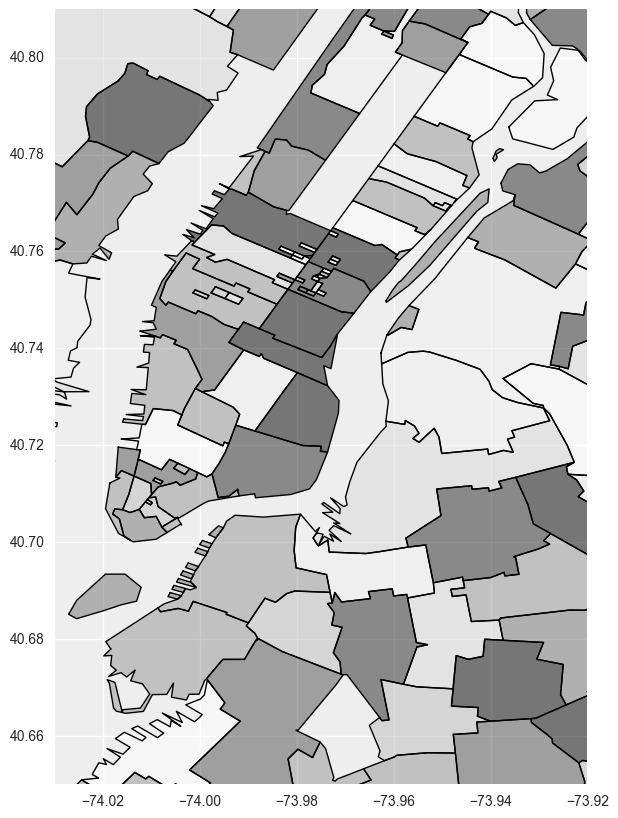

In [33]:
zipcodes.plot()
plt.xlim(-74.03, -73.92)
plt.ylim(40.65, 40.81)